In [1]:
%matplotlib inline

import matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import yfinance as yf

pass_col={}
def data_imp(**data):
    for key,value in list(data.items()):
        
        value=value        
        value=pd.read_csv(f'Top 100 Crypto Coins/{value}.csv',index_col='Date')
        pass_col.update({f'{key}':value})
        
    return pass_col
print('hi')

hi


In [39]:
Data=data_imp(btc='bitcoin',
            aave='Aave',
            bnb='BNB')
bnb=pd.read_csv('bnb.csv',index_col='Date')

**Data**

In [229]:
aave=pd.read_csv('Aave.csv',index_col='Date')
# apecoin=pd.read_csv('apecoin.csv',index_col='Date')
# apecoin.drop(['Currency','Volume'],axis=1,inplace=True)
# apecoin.to_csv('apecoin.csv',index=False)
aave.head(10)

,Open,High,Low,Close,Volume,Currency
Date,,,,,,
2020-10-02,0.000000,0.516571,0.000000,0.516571,0.0,USD
2020-10-03,0.523836,65.305939,0.523801,53.151489,0.0,USD
2020-10-04,53.179859,55.070354,50.688992,52.675034,0.0,USD
2020-10-05,52.675034,55.112358,49.787899,53.219242,0.0,USD
2020-10-06,53.291969,53.402271,40.734577,42.401600,583091.0,USD
2020-10-07,42.399948,42.408314,35.970692,40.083977,682834.0,USD
2020-10-08,39.885262,44.902512,36.696056,43.764462,1658817.0,USD
2020-10-09,43.764462,47.569534,43.291775,46.817745,815538.0,USD
2020-10-10,46.818146,51.405655,46.703327,49.133717,1074627.0,USD


In [250]:
lyi=[131,1]

data.append(lyi)

C:\Users\erfan\AppData\Local\Temp\ipykernel_4928\1050663741.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data.append(lyi)


,0
0,131
1,1


In [268]:
aave['Close'][1]


53.1514892578125

In [269]:
def diff_price(x):
    data=pd.DataFrame()
    raw=[]
    for i in range(len(x)):
        new_price=x.iloc[i,3]
        old_price=x.iloc[i-1,3]
        diff_1=((new_price-old_price)/old_price)*100
        
        raw.append(diff_1)
    data=data.append(raw)
    return data
new_col=diff_price(aave)

for i in range(len(aave)):
    diff=((aave.iloc[i,3]- aave.iloc[i-1,3])/aave.iloc[i-1,3] )*100
    aave['%change'][i]=diff
    

C:\Users\erfan\AppData\Local\Temp\ipykernel_4928\2381843861.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data=data.append(raw)
C:\Users\erfan\AppData\Local\Temp\ipykernel_4928\2381843861.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aave['%change'][i]=diff


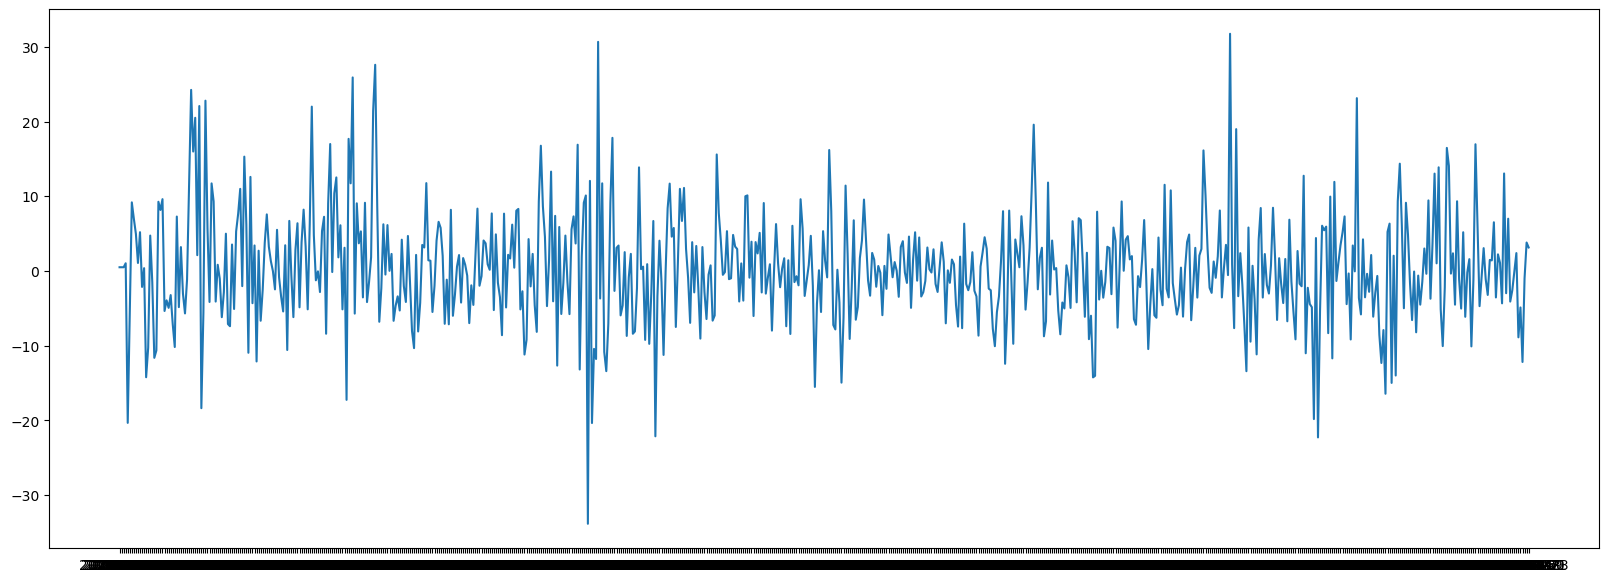

In [279]:
plt.figure(figsize=(20,7))
plt.plot(aave.index,aave['%change'])
# aave['%change'][0]=0.5
# aave['%change'][1]=0.5
Aave 

2021-12-17, Close, 46202.14 and high price 48004.89
2021-12-18, Close, 46848.78 and high price 47313.83
2021-12-19, Close, 46707.02 and high price 48089.66
2021-12-20, Close, 46880.28 and high price 47401.72
2021-12-21, Close, 48936.61 and high price 49300.92
2021-12-22, Close, 48628.51 and high price 49544.8
2021-12-23, Close, 50784.54 and high price 51332.34
2021-12-23, BUY CREATE at: 50784.54
2021-12-24, Close, 50822.20 and high price 51814.03
2021-12-24, BUY CREATE at: 50822.20
2021-12-25, Close, 50429.86 and high price 51176.6
2021-12-25, BUY CREATE at: 50429.86
2021-12-26, Close, 50809.52 and high price 51196.38
2021-12-26, BUY CREATE at: 50809.52
2021-12-27, Close, 50640.42 and high price 51956.33
2021-12-27, BUY CREATE at: 50640.42
2021-12-28, Close, 47588.86 and high price 50679.86
2021-12-28, BUY CREATE at: 47588.86
2021-12-29, Close, 46444.71 and high price 48119.74
2021-12-30, Close, 47178.12 and high price 47879.96
2021-12-31, Close, 46306.45 and high price 48472.53
2022-0

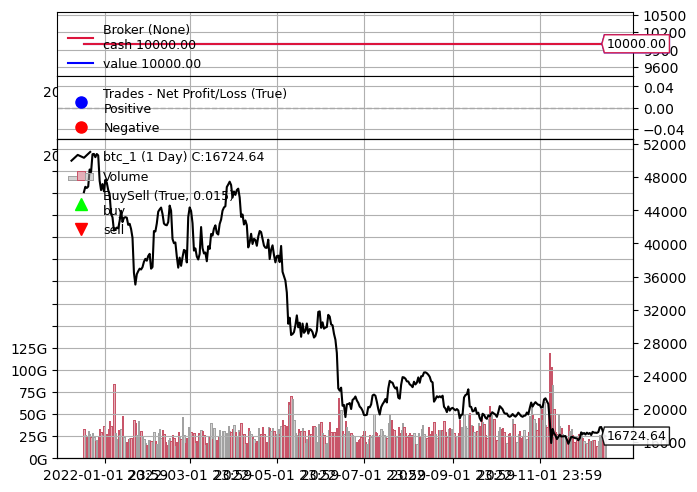

In [196]:
from __future__ import (absolute_import, division, print_function,
                        unicode_literals)

import matplotlib
%matplotlib inline
import backtrader as bt

#   import backtrader.plot
    
# Create a Stratey
class TestStrategy(bt.Strategy):

    def log(self, txt, dt=None):
        ''' Logging function for this strategy'''
        dt = dt or self.datas[0].datetime.date(0)
        print('%s, %s' % (dt.isoformat(), txt))

    def __init__(self):
        # Keep a reference to the "close" line in the data[0] dataseries
        self.dataclose = self.datas[0].close
        self.datahigh=self.datas[0].high

    def next(self):
        # Simply log the closing price of the series from the reference
        self.log(f'Close, {self.dataclose[0] :.2f} and high price {self.datahigh[0] }' ) 
        if self.datahigh >50000:
            self.log('BUY CREATE at: %.2f' % self.dataclose[0])
            self.buy()
            


if __name__ == '__main__':
    # Create a cerebro entity
    cerebro = bt.Cerebro()
    data=bt.feeds.YahooFinanceCSVData(dataname='btc_1.csv')

    # Add a strategy
    
    cerebro = bt.Cerebro()
    cerebro.adddata(data)
    cerebro.addstrategy(TestStrategy)

    deposit=cerebro.broker.getvalue()
    cerebro.run()
    print('\n Starting Portfolio Value: %.2f' % deposit)
    end_deposit=cerebro.broker.getvalue()
    print('Final Portfolio Value: %.2f' %   end_deposit )
    cerebro.plot(iplot=False)

In [129]:
%reset -f

In [11]:
# import pandas as pd
data=pd.read_csv('soft.csv',parse_dates=['Date'],index_col='Date')
data['sell']=None
data['buy']=None
data.head(2)

,Open,High,Low,Close,Adj Close,Volume,sell,buy
Date,,,,,,,,
2018-01-02,86.129997,86.309998,85.500000,85.949997,80.940361,22483800,None,None
2018-01-03,86.059998,86.510002,85.970001,86.349998,81.317078,26061400,None,None


In [4]:
buy=[]
sell=[]
for i in range(len(data)):
    try:
    # Bullish Alpha, 3 mean low COlumn
        if data.iloc[i, 3] < data.iloc[i - 5, 3] and data.iloc[i, 3] < data.iloc[i -13, 3] and data.iloc[i, 3] > data.iloc[i - 21, 3] and \
                            data.iloc[i, 4] > data.iloc[i - 1, 4]:
                            data.loc[i+1,'buy']= 1
                            
        # Bearish Alpha
        elif data.iloc[i, 2] > data.iloc[i - 5, 2] and data.iloc[i, 2] > data.iloc[i- 13,2] and data.iloc[i, 2] < data.iloc[i - 21, 2] and \
                    data.iloc[i, 4] < data.iloc[i - 1, 4] :
                    data.loc[i+1,'sell']= -1
                    
    except IndexError:
        print('no raised')

# print(f'Buy position {data["sell"].isin([-1]).sum()} \n'
        # f'Sell positon {data["buy"].isin([1]).sum()}')

In [313]:
class_name=['none','bullish_hammer','bearish_hammer','three white soldier','bulish_engulfing','bearish_engulfing']
col_name=list(bnb.columns) # [ Open=0, High=1, Low=2, Close=3 ]
body = 50
'''
Use body = 0.0005 for EURUSD, USDCHF, GBPUSD, USDCAD
Use body = 50 for BTCUSD
Use body = 10 for ETHUSD
Use body = 2 for XAUUSD
Use body = 5 for SP500m, UK100

Use wick = 0.0002 for EURUSD, USDCHF, GBPUSD, USDCAD
Use wick = 10 for BTCUSD
Use wick = 2 for ETHUSD
Use wick = 0.5 for XAUUSD
Use wick = 3 for SP500m, UK100
'''
hammer_result={
    'Bearish':[],
    'Bullish':[],
    'Bearish_time':[],
    'Bullish_time':[],
    'Bullish_Close':[],
    'Bearish_Close':[]

    }

#This is the hammer pattern
def Hammer(X):
    for i in range(len(X)):  

        # Bullish pattern
        if X.iloc[i, 1] > X.iloc[i, 0 ] and \
                abs(X.iloc[i - 1, 3 ] - X.iloc[i - 1, 0]) < body and \
                X.iloc[i - 1, 3 ]  and \
                X.iloc[i - 2, 3] < X.iloc[i - 2, 0]:
                        #  data[i + 1, buy_column] = 1 
                        hammer_result['Bullish'].append(1)
                        hammer_result['Bullish_time'].append(X.index[i])
                        hammer_result['Bullish_Close'].append(X.iloc[i,3])

                # Bearish pattern
        elif X.iloc[i, 3] < X.iloc[i, 0] and \
            abs(X.iloc[i - 1, 3] - X.iloc[i - 1, 0]) < body and \
            X.iloc[i - 2, 3] > X.iloc[i - 2, 0]:
                        #  data[i + 1, sell_column] = -1    
                        hammer_result['Bearish'].append(-1)
                        hammer_result['Bearish_time'].append(X.index[i])          
                        hammer_result['Bearish_Close'].append(X.iloc[i,3])

                            


Hammer(X=bnb)

6
